In [2]:
%matplotlib inline 
# above line allows for showing plots in a cell easily
import matplotlib # the main plotting library
#matplotlib.style.use('ggplot')
import numpy as np # allows for arrays
import matplotlib.pyplot as plt # getting specific plotting functions
import urllib # URL import functions
import pandas as pd # nice data utilities

In [3]:
q=pd.read_table('./data/log_1.csv', header=0,sep=',',names=['t','tm','s']);

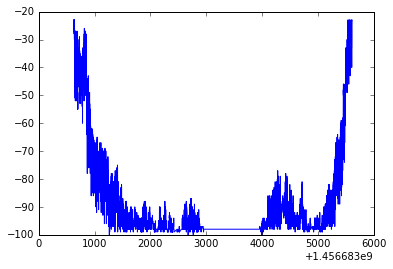

In [4]:
plt.plot(q.t,q.s); plt.xlabel()

In [5]:
6000/60

100.0